Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

#Beginning of the replication of Lecture Code:
- Policies: AKA Rules and guidelines I set for myself. 
  - I will never copy and paste any code from Austin Lasseters `(Lambda School, DSPT6 - Unit 1 Instructor)`, lecture code. 
  - I will never replicate all of the material in cells. 
    - If I feel as though the material is better able to be digested in a simple example summary in text with sample generic code. Then I will over executed the same material in cells. 
  - Sometimes my comments will have have some mild color to it's language. `:shrug:` My words are my own. 
  


In [0]:
# importing the relevant libraries that are going to be needed during this notebook: 
# also really never assume this bit is going to get pasted for you!

import pandas as pd 
import numpy as np

# i hope this is the lat time I have to use this particular library. 
# it's codebase is outdated -- its hilarious this fact is mentioned in lecture.
# the instructor utilized depracted code that will not be applicable to us in >2 months. --> this will be a text further south.
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Denotations and Defintions: 

- A **categorical variable** is `variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.`
- A **continous variable** is ` one which can take on an uncountable set of values. For example, a variable over a non-empty range of the real numbers is continuous, if it can take on any value in that range.`



In [3]:
# reading in the csv from the professors github that has the "titanic dataset". 

link = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
t_df = pd.read_csv(link)

# this is superior version of .head() or .tail(); faster for jank analysis. 
t_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
68,0,3,male,29.0,8.0500,Southampton
686,0,2,male,21.0,11.5000,Southampton
311,1,1,male,36.0,120.0000,Southampton
612,0,3,male,32.0,8.3625,Southampton
51,0,3,male,26.0,8.6625,Southampton
525,0,2,male,32.0,73.5000,Southampton
385,1,1,male,25.0,91.0792,Cherbourg
379,0,3,male,29.0,7.0458,Southampton
82,1,3,female,21.0,7.6500,Southampton
441,1,1,female,48.0,39.6000,Cherbourg


In [6]:
# Pclass is a categorical variable.
# the dictionary for that is : 1 = First Class, 2 = Second Class, 3 = Third Class. 

t_df['cabin_class'] = t_df['Pclass'].map({1:'First Class', 2:'Second Class', 3:'Third Class'})
t_df[['Pclass', 'cabin_class']].sample(6)

,Pclass,cabin_class
549,1,First Class
654,3,Third Class
684,3,Third Class
103,3,Third Class
316,3,Third Class
647,3,Third Class


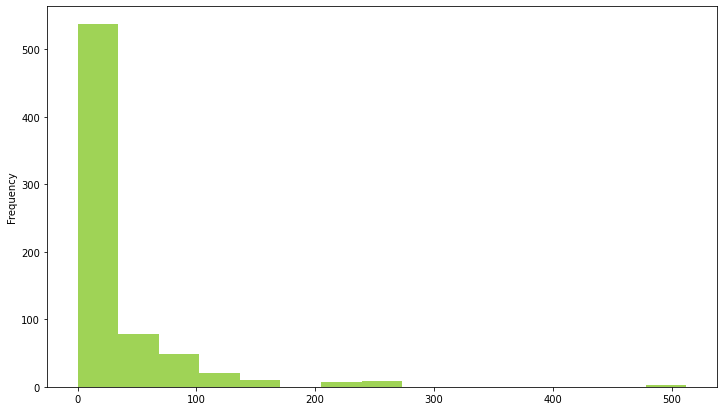

In [15]:
# fare is a continous variable which allows for us to use a histogram. 
t_df['Fare'].plot(kind='hist', bins=15, color='#9FD356', figsize=(12,7));

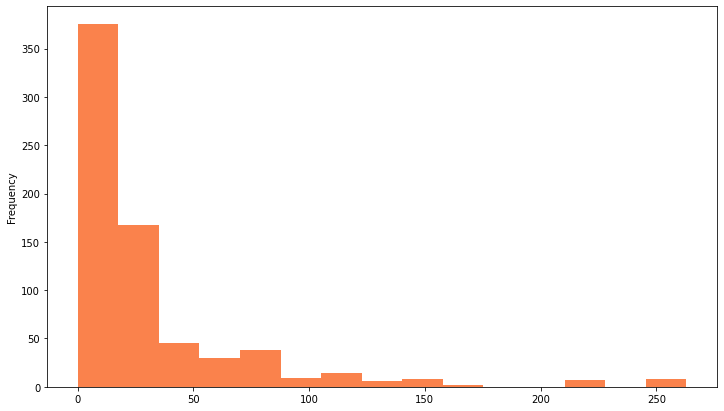

In [16]:
# as we can see from the above graph there is an outlier at ~500. 
# in order to remove the outlier we are going to execute the following code. 
t_df = t_df[t_df['Fare']<500]
t_df['Fare'].plot(kind='hist', bins=15, color='#FA824C', figsize=(12,7));

In [17]:
# a continuous variable can be converted into a categorical variable by binning:  
t_df['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

Resource: 

1. [pdbpython guide on `pd.cut`](https://pbpython.com/pandas-qcut-cut.html) 


In [0]:
# in order to do this we create "bins" of ranges.

fare_bin = [0, 8, 15, 33, 10000]
fare_labels = ['Nothing', 'Subway $', 'Mendocino Farms $', 'Sushi $']

In [24]:
# we apply the bin cut offs to the titanic dataframe.
t_df['fare_groups'] = pd.cut(t_df['Fare'], bins=fare_bin, labels=fare_labels)
t_df['fare_groups'].value_counts().sort_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Nothing              154
Subway $             189
Mendocino Farms $    185
Sushi $              174
Name: fare_groups, dtype: int64

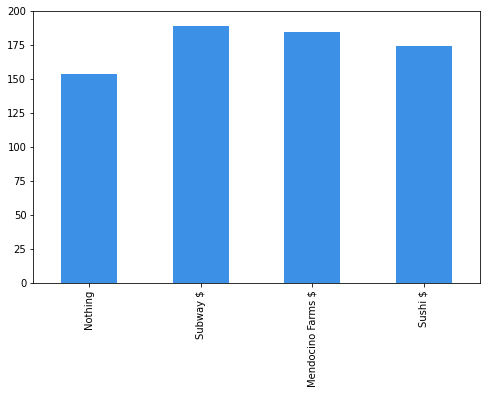

In [30]:
result = t_df['fare_groups'].value_counts().sort_index()
result.plot(ylim = (0, 200), kind='bar', color='#3C91E6', figsize=(8,5));

# oh my, did you notice my sweet color schemes? 

Notes on how colors and figures are generated. 

1. [Coolors App](https://coolors.co/app)
2. Figure sizes are genearted to maximize my screen real estate. [Screenshot to provide reference](https://imgur.com/a/KRpk3g0). 27" Monitor with a Resolution of 2560x1600


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here